In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from model import PINN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
data1 = pd.read_csv("data/astrometry_NACO.csv")
data2 = pd.read_csv("data/astrometry_SHARP.csv")


(-0.02411535, 0.18924834999999998, -0.0446277, 0.0767177)

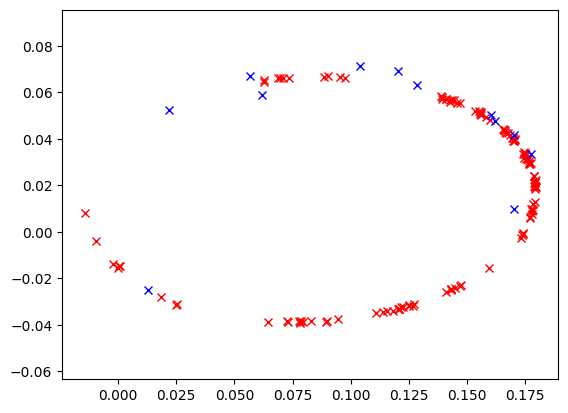

In [12]:
y1 = data1.iloc[:,1].values  
x1 = data1.iloc[:,3].values

y2 = data2.iloc[:,1].values 
x2 = data2.iloc[:,3].values 


fig, ax = plt.subplots()
ax.plot(x1, y1, 'rx')
ax.plot(x2, y2, 'bx')
ax.plot()
ax.axis('equal')

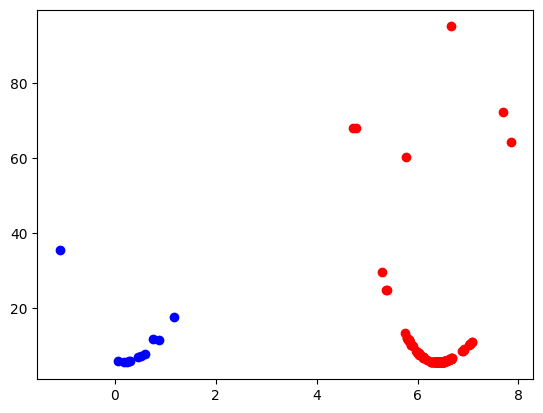

In [ ]:
phi1 = np.arctan(y1/x1) + torch.pi * 2
phi2 = np.arctan(y2/x2)
phi = torch.cat((torch.tensor(phi1, dtype=torch.float32), torch.tensor(phi2, dtype=torch.float32))).unsqueeze(1)

u1 = 1/np.sqrt(x1**2 + y1**2)
u2 = 1/np.sqrt(x2**2 + y2**2)

u = torch.cat((torch.tensor(u1, dtype=torch.float32), torch.tensor(u2, dtype=torch.float32))).unsqueeze(1)
plt.plot(phi1, u1, 'ro')
plt.plot(phi2, u2, 'bo')

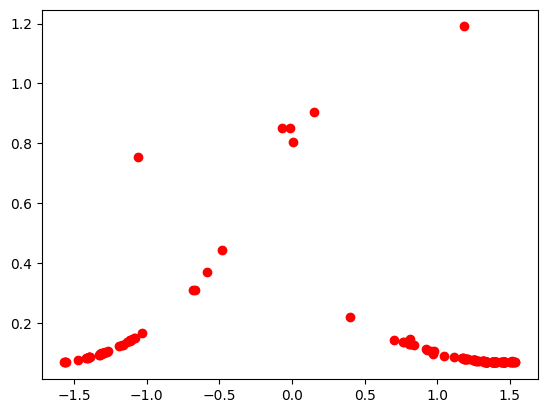

In [4]:
micro_arcsec_to_au = torch.pi / (3600*180) * 8 * 1000 * 206265 * 1e-2 # to units 1e-2 AU

x1 = data1.iloc[:,1].values * micro_arcsec_to_au 
y1 = data1.iloc[:,3].values * micro_arcsec_to_au

x2 = data2.iloc[:,1].values * micro_arcsec_to_au
y2 = data2.iloc[:,3].values * micro_arcsec_to_au


# X values
phi1 = np.arctan(y1/x1)
phi2 = np.arctan(y2/x2)
phi = torch.cat((torch.tensor(phi1, dtype=torch.float32), torch.tensor(phi2, dtype=torch.float32))).unsqueeze(1)

#phi_aug = phi + (torch.randint(low=0,high=3,size=phi.shape) - 1) * torch.pi


# Y values
u1 = 1/np.sqrt(x1**2 + y1**2)
u2 = 1/np.sqrt(x2**2 + y2**2)

u = torch.cat((torch.tensor(u1, dtype=torch.float32), torch.tensor(u2, dtype=torch.float32))).unsqueeze(1)
plt.plot(phi, u, 'ro')

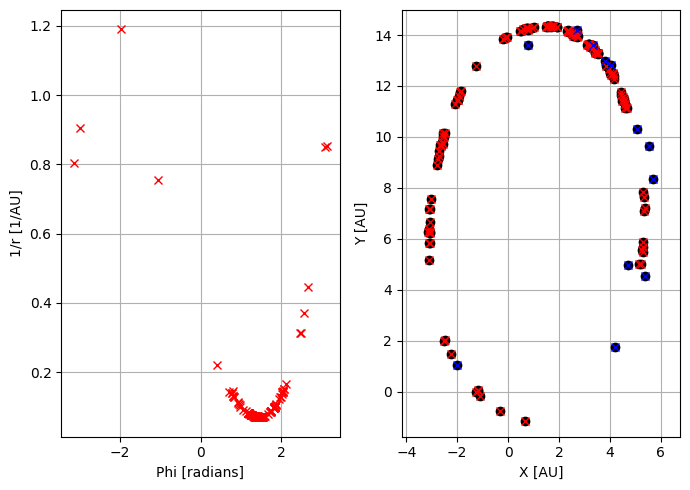

In [5]:
cat_data = True
if cat_data:    
    x_ = torch.cat((torch.tensor(x1), torch.tensor(x2))).unsqueeze(1)
    y_ = torch.cat((torch.tensor(y1), torch.tensor(y2))).unsqueeze(1)
else:
    x_ = torch.tensor(x1).unsqueeze(1)
    y_ = torch.tensor(y1).unsqueeze(1)

phi = np.arccos(x_*u)
phi = torch.where(y_<0., -phi, phi).float()



fig, ax = plt.subplots(figsize=(7,5), ncols=2)
#ax.set_xscale("log")

ax[0].plot(phi, u, 'rx')
ax[0].set_ylabel("1/r [1/AU]")
ax[0].set_xlabel("Phi [radians]")



ax[1].plot(np.cos(phi[:,0])/u[:,0], np.sin(phi[:,0])/u[:,0], 'ko')
ax[1].plot(x1, y1, 'rx')
ax[1].plot(x2, y2, 'bx')
ax[1].set_ylabel("Y [AU]")
ax[1].set_xlabel("X [AU]")
ax[1].axis('equal')

[axi.grid() for axi in ax]

plt.tight_layout()

#ax[1].set_ylim(-50,50); ax[1].set_xlim(-140, -60)